11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6932 - accuracy: 6.8333e-04 - val_loss: 0.6931 - val_accuracy: 8.0000e-04
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6930 - accuracy: 7.0000e-04 - val_loss: 0.6929 - val_accuracy: 8.0000e-04
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6928 - accuracy: 6.8333e-04 - val_loss: 0.6927 - val_accuracy: 8.0000e-04
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6926 - accuracy: 6.8333e-04 - val_loss: 0.6925 - val_accuracy: 8.0000e-04
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6924 - accuracy: 7.1667e-04 - val_loss: 0.6923 - val_accuracy: 8.0000e-04
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6922 - accuracy: 7.5000e-04 - val_loss: 0.6921 - val_accuracy: 8.0000e-04
Epo

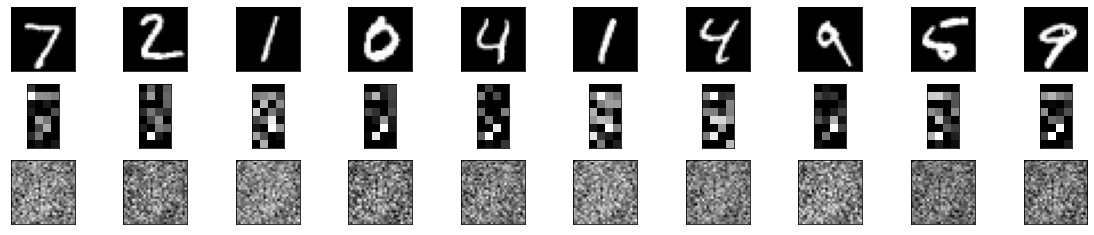

In [3]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)
autoencoder=Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=
['accuracy'])
autoencoder.fit(X_train, X_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(X_test, X_test))
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)
plt.figure(figsize=(40, 4))
for i in range(10):
# display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()